In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def plot_loss(history):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color='blue',label='loss')
  plt.semilogy(history.epoch, history.history['val_loss'],
               color='red',label='val_loss')

  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


# LeNet

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6,(5,5),activation="relu",input_shape=x_train.shape[1:],padding='valid'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(10,(5,5),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(120,activation='relu'),
    tf.keras.layers.Dense(84,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

# model.summary()

history = model.fit(x_train,y_train,validation_split=0.1,epochs=60, batch_size=200)

Epoch 1/60
270/270 [==============================] - 4s 11ms/step - loss: 0.8762 - accuracy: 0.6831 - val_loss: 0.5308 - val_accuracy: 0.8028
Epoch 2/60
270/270 [==============================] - 3s 10ms/step - loss: 0.5616 - accuracy: 0.7937 - val_loss: 0.4688 - val_accuracy: 0.8242
Epoch 3/60
270/270 [==============================] - 3s 10ms/step - loss: 0.4962 - accuracy: 0.8164 - val_loss: 0.4172 - val_accuracy: 0.8428
Epoch 4/60
270/270 [==============================] - 3s 10ms/step - loss: 0.4596 - accuracy: 0.8303 - val_loss: 0.4066 - val_accuracy: 0.8437
Epoch 5/60
270/270 [==============================] - 3s 9ms/step - loss: 0.4312 - accuracy: 0.8418 - val_loss: 0.3727 - val_accuracy: 0.8645
Epoch 6/60
270/270 [==============================] - 2s 9ms/step - loss: 0.4108 - accuracy: 0.8487 - val_loss: 0.3648 - val_accuracy: 0.8665
Epoch 7/60
270/270 [==============================] - 2s 9ms/step - loss: 0.3982 - accuracy: 0.8533 - val_loss: 0.3488 - val_accuracy: 0.8698
Ep

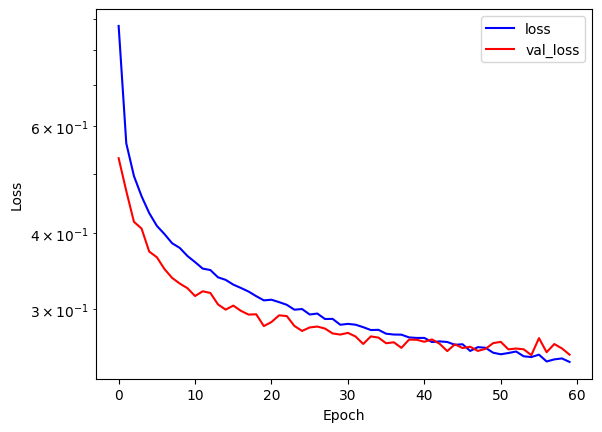

In [6]:
plot_loss(history)

In [7]:
model.evaluate(x_test,y_test, batch_size=1)

10000/10000 [==============================] - 63s 6ms/step - loss: 0.2708 - accuracy: 0.9011


[0.27078568935394287, 0.9010999798774719]

# VGG

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(1,1),activation="relu",input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(112,(2,2),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(256,(2,2),activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(512,(2,2),activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(120,activation='relu'),
    tf.keras.layers.Dense(84,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["Accuracy"]
)

# model.summary()

history = model.fit(x_train,y_train,validation_split=0.2,epochs=10)

Epoch 1/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.8890 - Accuracy: 0.6690 - val_loss: 0.6138 - val_Accuracy: 0.7692
Epoch 2/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.5978 - Accuracy: 0.7781 - val_loss: 0.5269 - val_Accuracy: 0.8059
Epoch 3/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.5248 - Accuracy: 0.8066 - val_loss: 0.4867 - val_Accuracy: 0.8163
Epoch 4/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.4768 - Accuracy: 0.8239 - val_loss: 0.4590 - val_Accuracy: 0.8313
Epoch 5/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.4436 - Accuracy: 0.8360 - val_loss: 0.4237 - val_Accuracy: 0.8383
Epoch 6/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.4204 - Accuracy: 0.8451 - val_loss: 0.4260 - val_Accuracy: 0.8407
Epoch 7/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.4031 - Accuracy: 0.8514 - val_loss: 0.4049 - val_A

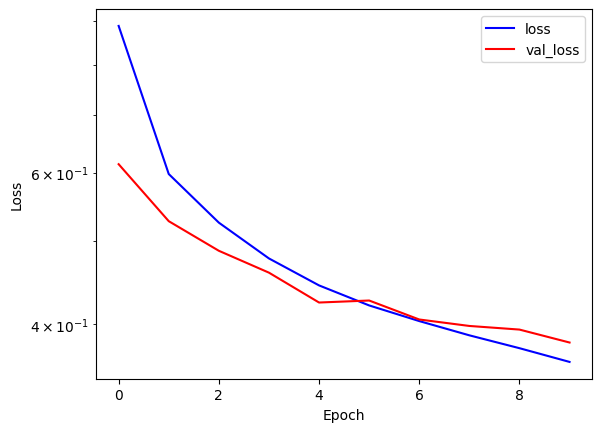

In [11]:
plot_loss(history)

In [12]:
model.evaluate(x_test,y_test, batch_size=1)
model.save('./TP1/fashion_mnist/fashion_mnist.keras')

10000/10000 [==============================] - 37s 4ms/step - loss: 0.3942 - Accuracy: 0.8541
